# Setting Up Spark Session

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=3fe4ae746f23a94936e46649076a03e8e4bd7d79311f08ec02fab2f59089efeb
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("WeatherClassification").getOrCreate()

In [ ]:
spark

# Importing the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [ ]:
# Step 2: Load the Dataset
file_path = "/content/drive/MyDrive/Datasets/weather_classification_data.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
# Show schema and first few rows
data.printSchema()
data.show(5)

root
 |-- Temperature: double (nullable = true)
 |-- Humidity: integer (nullable = true)
 |-- Wind Speed: double (nullable = true)
 |-- Precipitation (%): double (nullable = true)
 |-- Cloud Cover: string (nullable = true)
 |-- Atmospheric Pressure: double (nullable = true)
 |-- UV Index: integer (nullable = true)
 |-- Season: string (nullable = true)
 |-- Visibility (km): double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Weather Type: string (nullable = true)

+-----------+--------+----------+-----------------+-------------+--------------------+--------+------+---------------+--------+------------+
|Temperature|Humidity|Wind Speed|Precipitation (%)|  Cloud Cover|Atmospheric Pressure|UV Index|Season|Visibility (km)|Location|Weather Type|
+-----------+--------+----------+-----------------+-------------+--------------------+--------+------+---------------+--------+------------+
|       14.0|      73|       9.5|             82.0|partly cloudy|             1010.82|     

In [ ]:
print((data.count(), len(data.columns)))

(13200, 11)


In [ ]:
data.describe().show()

+-------+-----------------+-----------------+-----------------+------------------+-------------+--------------------+-----------------+------+------------------+--------+------------+
|summary|      Temperature|         Humidity|       Wind Speed| Precipitation (%)|  Cloud Cover|Atmospheric Pressure|         UV Index|Season|   Visibility (km)|Location|Weather Type|
+-------+-----------------+-----------------+-----------------+------------------+-------------+--------------------+-----------------+------+------------------+--------+------------+
|  count|            13200|            13200|            13200|             13200|        13200|               13200|            13200| 13200|             13200|   13200|       13200|
|   mean|19.12757575757576|68.71083333333333| 9.83219696969697|53.644393939393936|         NULL|  1005.8278962121199|4.005757575757576|  NULL| 5.462916666666667|    NULL|        NULL|
| stddev| 17.3863265823608|20.19424809063606|6.908704141531319|31.94654076998137

In [ ]:
from pyspark.sql.functions import col, sum

# Count missing values in each column
missing_values = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])
missing_values.show()

+-----------+--------+----------+-----------------+-----------+--------------------+--------+------+---------------+--------+------------+
|Temperature|Humidity|Wind Speed|Precipitation (%)|Cloud Cover|Atmospheric Pressure|UV Index|Season|Visibility (km)|Location|Weather Type|
+-----------+--------+----------+-----------------+-----------+--------------------+--------+------+---------------+--------+------------+
|          0|       0|         0|                0|          0|                   0|       0|     0|              0|       0|           0|
+-----------+--------+----------+-----------------+-----------+--------------------+--------+------+---------------+--------+------------+



In [ ]:
data.groupBy('Season').count().show()

+------+-----+
|Season|count|
+------+-----+
|Spring| 2598|
|Summer| 2492|
|Autumn| 2500|
|Winter| 5610|
+------+-----+



In [ ]:
data.groupBy('Cloud Cover').count().show()

+-------------+-----+
|  Cloud Cover|count|
+-------------+-----+
|partly cloudy| 4560|
|        clear| 2139|
|       cloudy|  411|
|     overcast| 6090|
+-------------+-----+



In [ ]:
df = data.toPandas()
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


# Basic EDAs

### Weather Type by Season

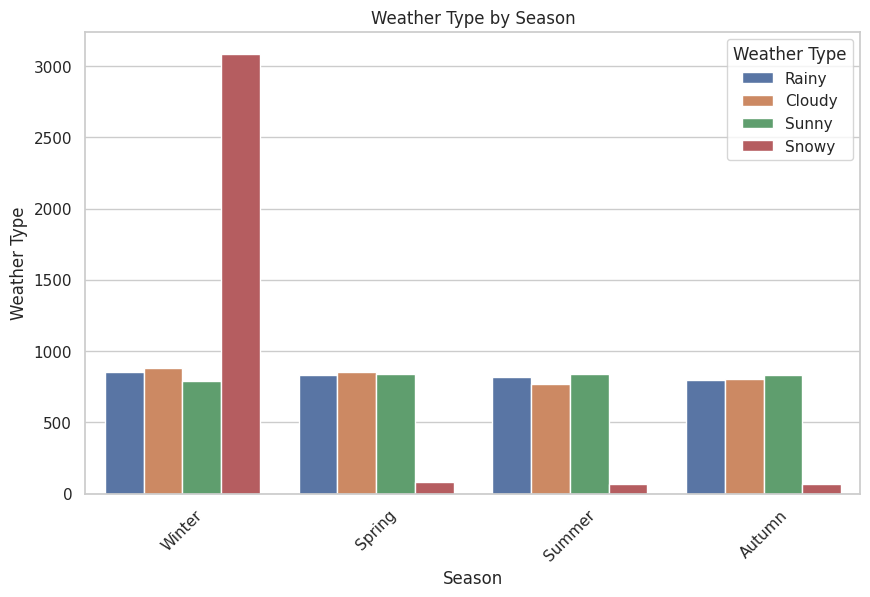

In [ ]:
# Weather Type by Season

plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Weather Type', data=df)
plt.title('Weather Type by Season')
plt.xlabel('Season')
plt.ylabel('Weather Type')
plt.xticks(rotation=45)
plt.show()

### Distribution of Weather Type

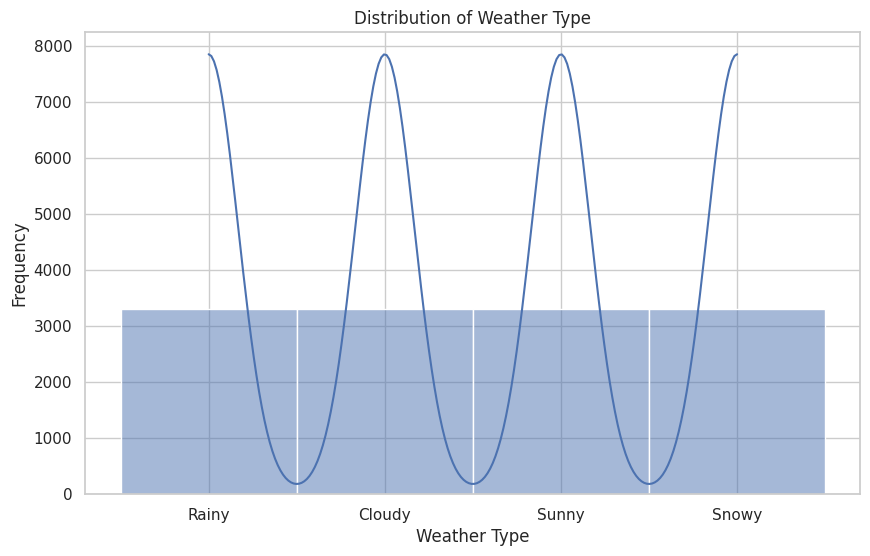

In [ ]:
# Distribution of Weather Type

plt.figure(figsize=(10, 6))
sns.histplot(df['Weather Type'], bins=30, kde=True)
plt.title('Distribution of Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Frequency')
plt.show()

### Weather Type by Location

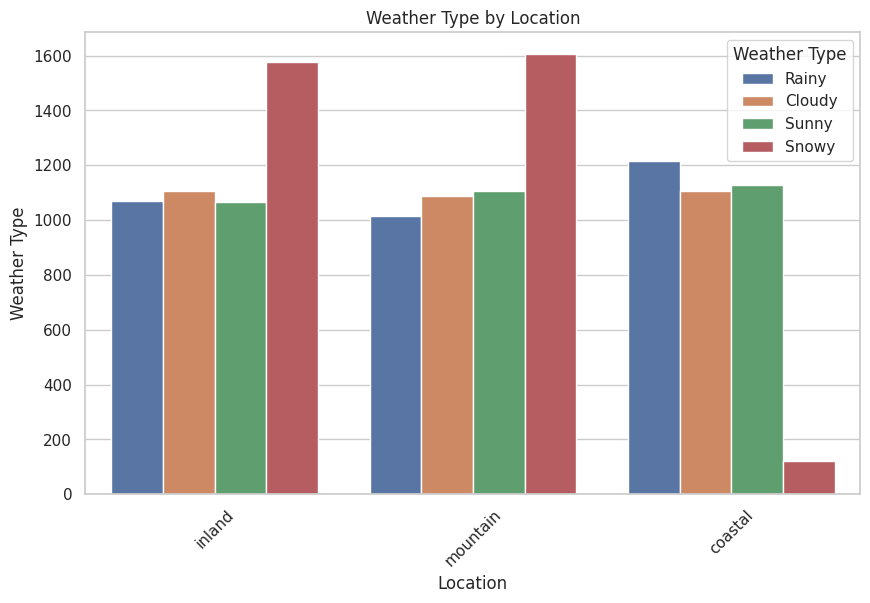

In [ ]:
# Weather Type by Location

plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Weather Type', data=df)
plt.title('Weather Type by Location')
plt.xlabel('Location')
plt.ylabel('Weather Type')
plt.xticks(rotation=45)
plt.show()

### Weather Type vs Temperature and Season

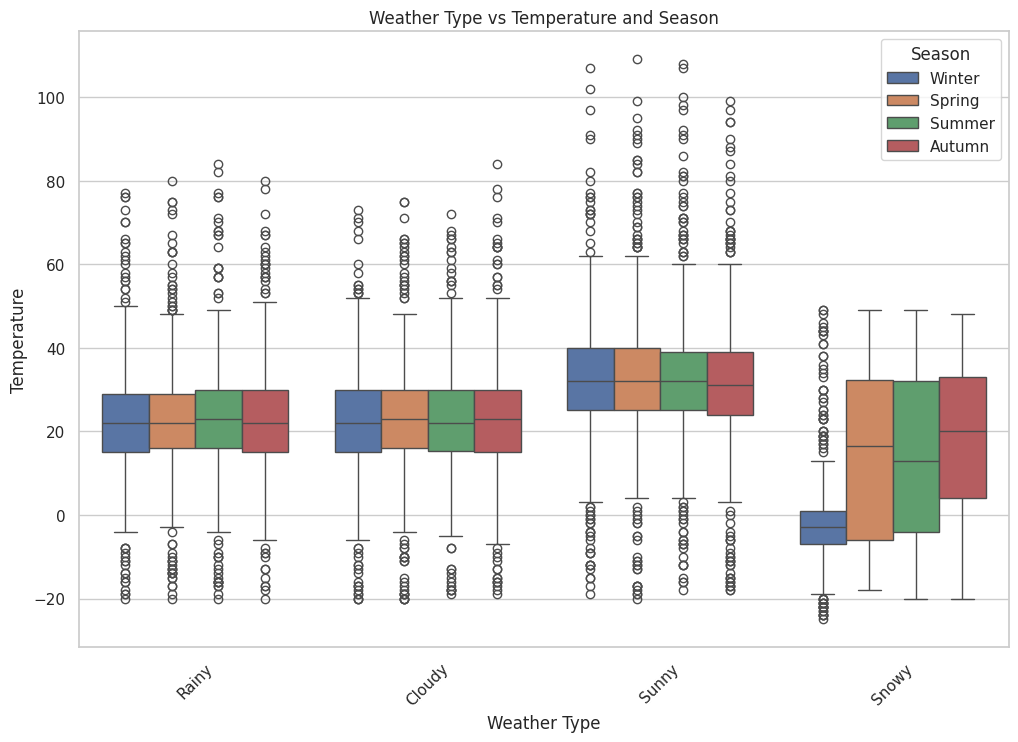

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Weather Type', y='Temperature', hue='Season', data=df)
plt.title('Weather Type vs Temperature and Season')
plt.xlabel('Weather Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()

### Weather Type by Precipitation

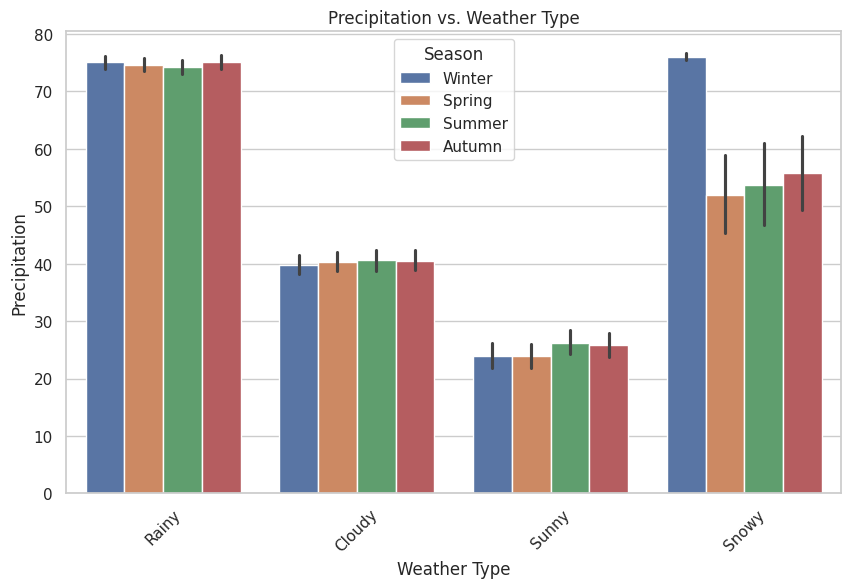

In [ ]:
# Weather Type by Precipitation

plt.figure(figsize=(10, 6))
sns.barplot(x='Weather Type', y='Precipitation (%)', hue='Season', data=df)
plt.title('Precipitation vs. Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Precipitation')
plt.xticks(rotation=45)
plt.show()

### Atmospheric Pressure by Season and Weather Type

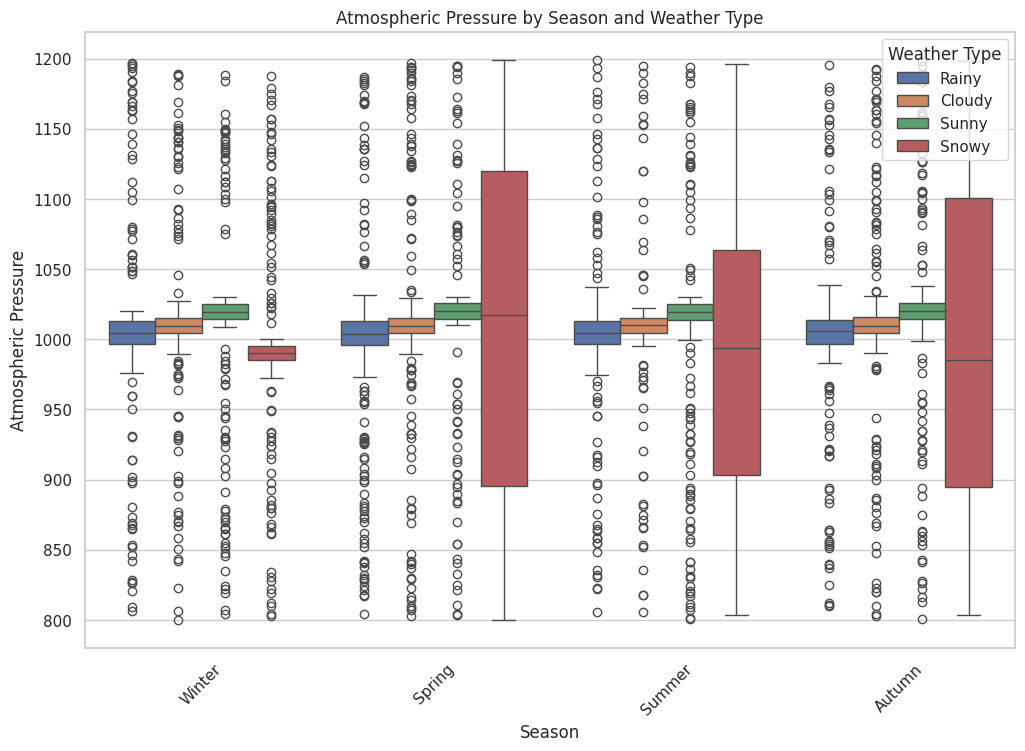

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='Atmospheric Pressure', hue='Weather Type', data=df)
plt.title('Atmospheric Pressure by Season and Weather Type')
plt.xlabel('Season')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=45)
plt.show()

### Relation between Humidity and Precipitation

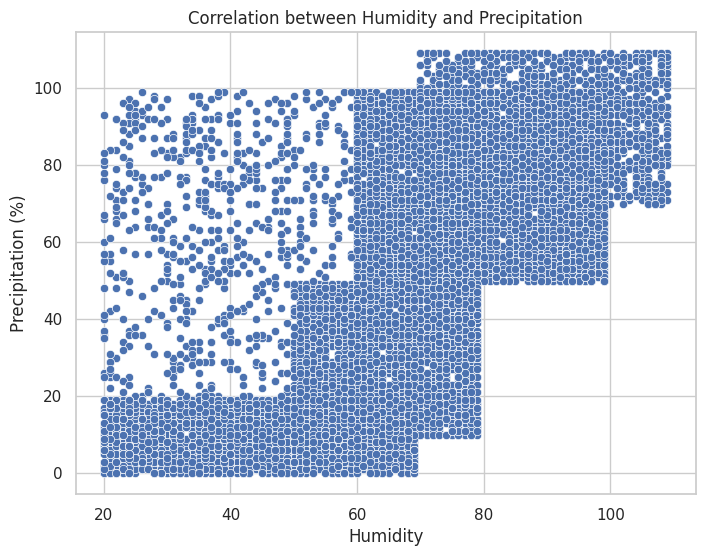

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Humidity', y='Precipitation (%)', data=df)
plt.title('Correlation between Humidity and Precipitation')
plt.xlabel('Humidity')
plt.ylabel('Precipitation (%)')
plt.show()

### UV Index by Season and Weather Type

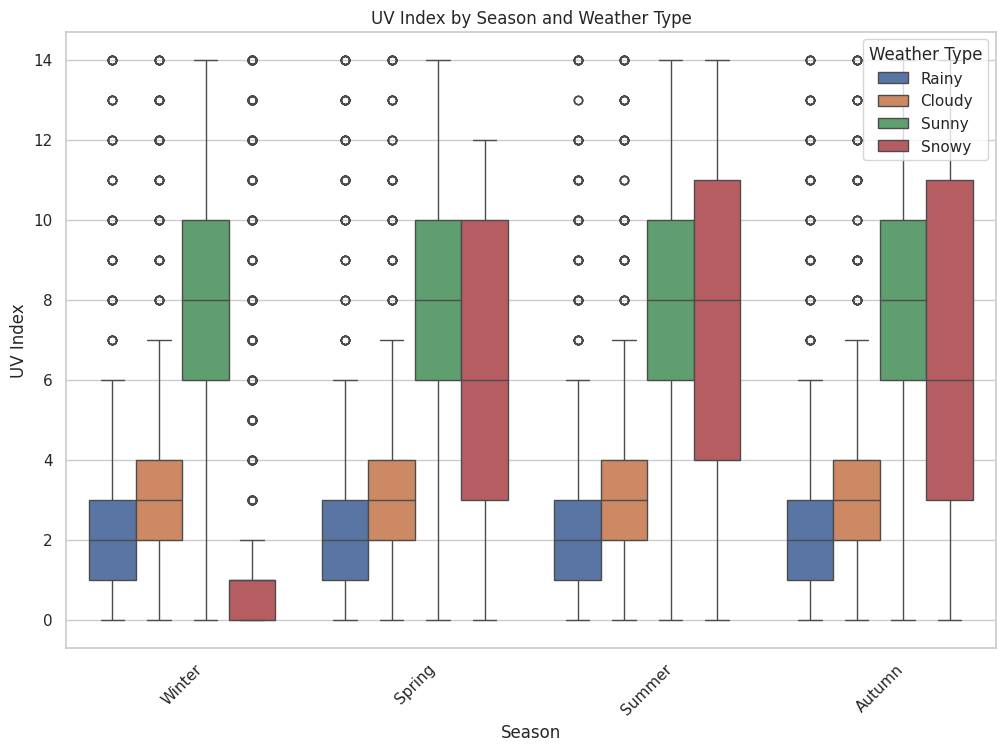

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='UV Index', hue='Weather Type', data=df)
plt.title('UV Index by Season and Weather Type')
plt.xlabel('Season')
plt.ylabel('UV Index')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering and Selection

### Calculating the Correlation of Numerical Variables

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

numerical_columns, categorical_columns

(Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
        'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
       dtype='object'),
 Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object'))

In [ ]:
# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

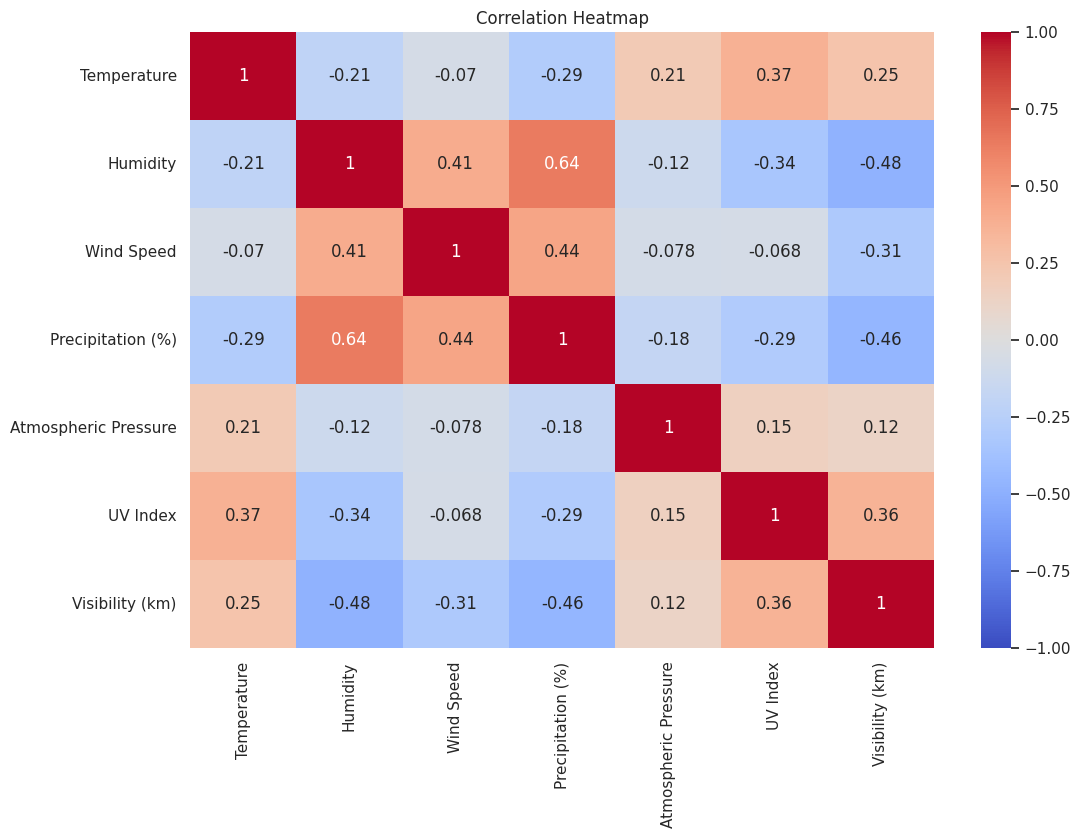

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Since 'Precipitation' and 'Humidity' columns are correlated, it's often better to drop the one that has less predictive power or relevance to the target variable. Generally, precipitation can be more directly related to weather types (e.g., rain, snow), making it more useful for classification tasks related to weather. Humidity, while also important, is a measure of moisture content and may not directly indicate specific weather events. Therefore, dropping 'Humidity' might be preferable as 'Precipitation' data can give more direct insights into weather types, potentially improving the model's performance and interpretability.**

In [ ]:
data = data.drop('Humidity')
data.show(5)

+-----------+----------+-----------------+-------------+--------------------+--------+------+---------------+--------+------------+
|Temperature|Wind Speed|Precipitation (%)|  Cloud Cover|Atmospheric Pressure|UV Index|Season|Visibility (km)|Location|Weather Type|
+-----------+----------+-----------------+-------------+--------------------+--------+------+---------------+--------+------------+
|       14.0|       9.5|             82.0|partly cloudy|             1010.82|       2|Winter|            3.5|  inland|       Rainy|
|       39.0|       8.5|             71.0|partly cloudy|             1011.43|       7|Spring|           10.0|  inland|      Cloudy|
|       30.0|       7.0|             16.0|        clear|             1018.72|       5|Spring|            5.5|mountain|       Sunny|
|       38.0|       1.5|             82.0|        clear|             1026.25|       7|Spring|            1.0| coastal|       Sunny|
|       27.0|      17.0|             66.0|     overcast|              990.67

In [ ]:
df2 = data.toPandas()

num_cols = df2.select_dtypes(include=['int', 'float']).columns
cat_cols = df2.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['Temperature', 'Wind Speed', 'Precipitation (%)',
        'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
       dtype='object'),
 Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object'))

In [ ]:
# Compute the correlation matrix
corr_matrix = df2[num_cols].corr()

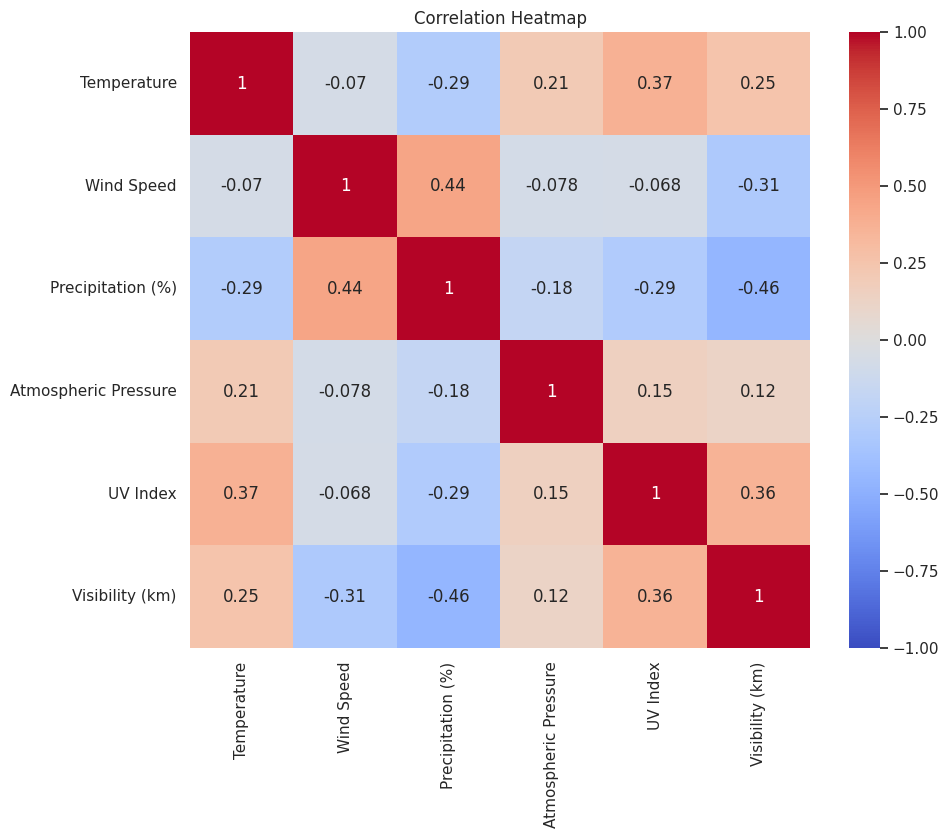

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**'Humidity' has been dropped to handle multi-collinearity within the dataset.**

### Encoding of Categorical Variables

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Assembling all features into a single feature vector
assembler = VectorAssembler(
    inputCols=[
        "Temperature",
        "Wind Speed",
        "Precipitation (%)",
        "Atmospheric Pressure",
        "UV Index",
        "Visibility (km)",
        "Cloud Cover_vec",
        "Location_vec",
        "Season_vec"
    ],
    outputCol="features"
)

In [ ]:
# Normalize features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

In [ ]:
# Indexing and One-Hot Encoding Categorical Variables
indexers = [
    StringIndexer(inputCol=column, outputCol=column + "_index").fit(data)
    for column in ["Cloud Cover", "Location", "Weather Type", "Season"]
]

encoders = [
    OneHotEncoder(inputCol=column + "_index", outputCol=column + "_vec")
    for column in ["Cloud Cover", "Location", "Season"]
]

In [ ]:
data.show(5)

+-----------+----------+-----------------+-------------+--------------------+--------+------+---------------+--------+------------+
|Temperature|Wind Speed|Precipitation (%)|  Cloud Cover|Atmospheric Pressure|UV Index|Season|Visibility (km)|Location|Weather Type|
+-----------+----------+-----------------+-------------+--------------------+--------+------+---------------+--------+------------+
|       14.0|       9.5|             82.0|partly cloudy|             1010.82|       2|Winter|            3.5|  inland|       Rainy|
|       39.0|       8.5|             71.0|partly cloudy|             1011.43|       7|Spring|           10.0|  inland|      Cloudy|
|       30.0|       7.0|             16.0|        clear|             1018.72|       5|Spring|            5.5|mountain|       Sunny|
|       38.0|       1.5|             82.0|        clear|             1026.25|       7|Spring|            1.0| coastal|       Sunny|
|       27.0|      17.0|             66.0|     overcast|              990.67

# Train-Test Split

In [ ]:
# Splitting the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
print((train_data.count(), len(train_data.columns)))
print((test_data.count(), len(test_data.columns)))

(10615, 10)
(2585, 10)


# Creating the ML Pipeline

In [ ]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier

In [ ]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(labelCol="Weather Type_index", featuresCol="features", maxIter=10),
    'Decision Tree': DecisionTreeClassifier(labelCol="Weather Type_index", featuresCol="features"),
    'Random Forest': RandomForestClassifier(labelCol="Weather Type_index", featuresCol="features")
}

### Training and Evaluating the Models

In [ ]:
# Loop through classifiers and evaluate each
results = {}
predictions_dict = {} # Dictionary to store predictions for each model
for name, clf in classifiers.items():
    pipeline = Pipeline(stages=indexers + encoders + [assembler, clf])
    print(f"\n{name} is running")
    model = pipeline.fit(train_data)
    predictions = model.transform(test_data)
    predictions_dict[name] = predictions
    evaluator = MulticlassClassificationEvaluator(
        labelCol="Weather Type_index", predictionCol="prediction", metricName="accuracy"
    )
    accuracy = evaluator.evaluate(predictions)
    print(f"\nAccuracy for {name}: {accuracy}")
    evaluator_f1 = MulticlassClassificationEvaluator(
        labelCol="Weather Type_index", predictionCol="prediction", metricName="f1"
    )
    f1_score = evaluator_f1.evaluate(predictions)
    print(f"F1 Score for {name}: {f1_score}")
    print("--"*60)

    results[name] = {'accuracy': accuracy, 'f1_score': f1_score}


Logistic Regression is running

Accuracy for Logistic Regression: 0.8688588007736944
F1 Score for Logistic Regression: 0.8691088706328739
------------------------------------------------------------------------------------------------------------------------

Decision Tree is running

Accuracy for Decision Tree: 0.9079303675048356
F1 Score for Decision Tree: 0.9085288848218532
------------------------------------------------------------------------------------------------------------------------

Random Forest is running

Accuracy for Random Forest: 0.9052224371373307
F1 Score for Random Forest: 0.9052850912162433
------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  - Test Accuracy: {metrics['accuracy']}")
    print(f"  - F1 Score: {metrics['f1_score']}\n")

Logistic Regression:
  - Test Accuracy: 0.8688588007736944
  - F1 Score: 0.8691088706328739

Decision Tree:
  - Test Accuracy: 0.9079303675048356
  - F1 Score: 0.9085288848218532

Random Forest:
  - Test Accuracy: 0.9052224371373307
  - F1 Score: 0.9052850912162433



### Confusion Matrices

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col, expr

# Create confusion matrix
def create_confusion_matrix(predictions, label_col, prediction_col):
    confusion_matrix = predictions.groupBy(label_col).pivot(prediction_col).count().fillna(0)
    return confusion_matrix

#### Confusion Matrix for Logistic Regression

In [ ]:
confusion_matrix_lr = create_confusion_matrix(predictions_dict['Logistic Regression'], "Weather Type_index", "prediction")
confusion_matrix_lr.show()

+------------------+---+---+---+---+
|Weather Type_index|0.0|1.0|2.0|3.0|
+------------------+---+---+---+---+
|               0.0|554| 64| 17| 27|
|               1.0| 52|571| 28|  8|
|               3.0| 56| 22| 16|551|
|               2.0| 25|  7|570| 17|
+------------------+---+---+---+---+



#### Confusion Matrix for Decision Tree

In [ ]:
confusion_matrix_dt = create_confusion_matrix(predictions_dict['Decision Tree'], "Weather Type_index", "prediction")
confusion_matrix_dt.show()

+------------------+---+---+---+---+
|Weather Type_index|0.0|1.0|2.0|3.0|
+------------------+---+---+---+---+
|               0.0|587| 44|  6| 25|
|               1.0| 36|612|  1| 10|
|               3.0| 41| 22|  2|580|
|               2.0| 28| 12|568| 11|
+------------------+---+---+---+---+



#### Confusion Matrix for Random Forest

In [ ]:
confusion_matrix_rf = create_confusion_matrix(predictions_dict['Random Forest'], "Weather Type_index", "prediction")
confusion_matrix_rf.show()

+------------------+---+---+---+---+
|Weather Type_index|0.0|1.0|2.0|3.0|
+------------------+---+---+---+---+
|               0.0|573| 51|  9| 29|
|               1.0| 20|611| 10| 18|
|               3.0| 27| 22|  8|588|
|               2.0| 18| 13|568| 20|
+------------------+---+---+---+---+



# Visualizing the Model Performances

In [ ]:
# Extract data for plotting
model_names = list(results.keys())
accuracies = [metrics['accuracy'] for metrics in results.values()]
f1_scores = [metrics['f1_score'] for metrics in results.values()]

In [ ]:
performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores
})

In [ ]:
performance_df

,Model,Accuracy,F1 Score
0,Logistic Regression,0.868859,0.869109
1,Decision Tree,0.907930,0.908529
2,Random Forest,0.905222,0.905285


In [ ]:
# Plot the results
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

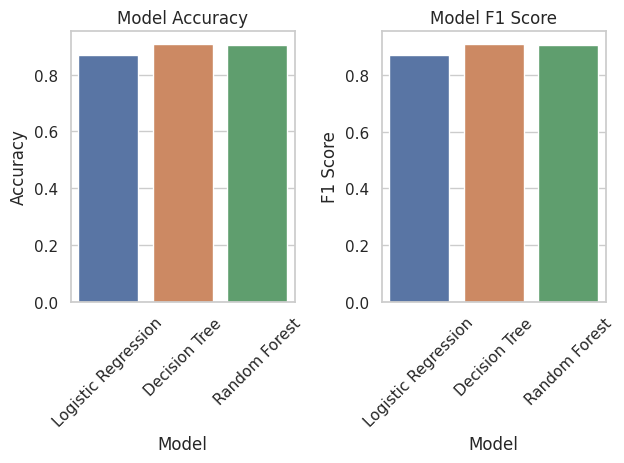

In [ ]:
# Accuracy Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', hue='Model', data=performance_df)
plt.title('Model Accuracy')
plt.xticks(rotation=45)

# F1 Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='F1 Score', hue='Model', data=performance_df)
plt.title('Model F1 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()